# Part 1

### Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

import time
import math

### Data (strings) and splitting

In [5]:
fname="DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter = ",",
                    usecols=(0,1), unpack=True, dtype=str)

N=len(sy)
print(N)

Ls=len(sx[0])
print(Ls)

print(sx[0],sy[0])

perc_train=0.8
N_train=int(N*perc_train)
N_test=N-N_train

print(f'\ndata: {N}\ntrain: {N_train}\ntest: {N_test}')

3000
16
AAGGTCTGCCGGCCGA 1

data: 3000
train: 2400
test: 600


In [6]:
#hot encoding to associate each character to a sequence of 0 and 1
Q = ["A","C","G","T"]
Nc=4
onehc={Q[i]:i for i in range(Nc)} #one hot encoding
print(onehc)

{'A': 0, 'C': 1, 'G': 2, 'T': 3}


### Data conversion

In [7]:
y = sy.astype(int)

L = Ls*Nc
print(L) #length of input layer

x = np.zeros((N,L)) #every row is an input
print(x[0])

for n in range(N): #for each sample
    for i in range(Ls): #for each character
        x[n][i*4 + onehc[sx[n][i]]] = 1
        
print(sx[0])
print(x[0])  
#hot encoding works (??????)

64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AAGGTCTGCCGGCCGA
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


### Split Train/Test-Validation

In [8]:
(x_train,y_train) = (x[:N_train],y[:N_train]) #TRAINING SET
(x_test,y_test)  = (x[N_train:],y[N_train:]) #TEST SET

print("Fraction of data=1 in the training:",y_train.sum()/N_train)
print("Fraction of data=1 in the test:",y_test.sum()/N_test)
#They are very similar

Fraction of data=1 in the training: 0.24333333333333335
Fraction of data=1 in the test: 0.25833333333333336


### Definition of model in keras

In [9]:
np.random.seed(123)

model = Sequential()

#I choose narrower dimensions of layers in my model (that's my choice)
#also activation is my choice
model.add(Dense(L,input_shape=(L,),activation="relu")) #set input layer of shape (1,0)
model.add(Dense(L/2,activation="relu"))
model.add(Dense(L/4,activation="relu"))
model.add(Dropout(0.2)) #drop non active nodes in the last layer(?)

#now I change the activation function because I want a prediciton as a probability of being 1
model.add(Dense(1,activation="sigmoid")) #OUTPUT


print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


### Optimization

In [10]:
opt1 = SGD(learning_rate=0.1,
           momentum=0.9,
           nesterov=True) 

model.compile(loss="binary_crossentropy", #check what it is
             optimizer=opt1, #"adam"
             metrics=['accuracy']) 


In [11]:
fit = model.fit(x_train, y_train, 
               epochs=30, batch_size=50,
               validation_data=(x_test,y_test),
                shuffle=True)

Epoch 1/30
48/48 [==============================] - 1s 21ms/step - loss: 0.5765 - accuracy: 0.7135 - val_loss: 0.5027 - val_accuracy: 0.7483
Epoch 2/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7513 - val_loss: 0.5026 - val_accuracy: 0.7633
Epoch 3/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7942 - val_loss: 0.4874 - val_accuracy: 0.7700
Epoch 4/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8123 - val_loss: 0.4902 - val_accuracy: 0.7733
Epoch 5/30
48/48 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8492 - val_loss: 0.4955 - val_accuracy: 0.7700
Epoch 6/30
48/48 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8594 - val_loss: 0.4991 - val_accuracy: 0.7700
Epoch 7/30
48/48 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9120 - val_loss: 0.4771 - val_accuracy: 0.7983
Epoch 8/30
48/48 [=

19/19 [==============================] - 0s 832us/step - loss: 1.4553 - accuracy: 0.8017

Test loss: 1.4552990198135376
Test accuracy: 0.8016666769981384


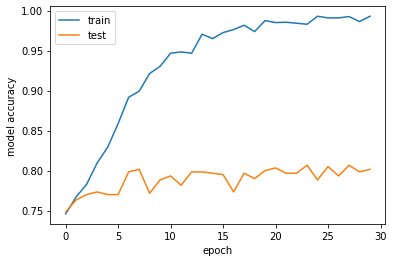

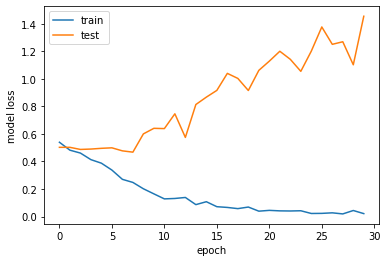

In [12]:
#Plot the results

score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Part 2

In [13]:
x_train_reshape = x_train.reshape(x_train.shape[0], int(x_train.shape[1]/4), 4)

new_x_train=[]
new_y_train=[]

for j in range(x_train_reshape.shape[0]):
    for i in range(x_train_reshape[j].shape[0]):
        new_x_train.append(np.concatenate((x_train_reshape[j][i:],x_train_reshape[j][:i])))
        new_y_train.append(y_train[j])

new_y_train = np.array(new_y_train)
new_x_train = np.array(new_x_train).reshape(x_train.shape[0]*16, x_train.shape[1])

In [14]:
fit_new = model.fit(new_x_train, new_y_train, 
                    epochs=30, batch_size=50,
                    validation_data=(x_test,y_test),
                    shuffle=True)

Epoch 1/30
768/768 [==============================] - 1s 1ms/step - loss: 0.4104 - accuracy: 0.8188 - val_loss: 0.3023 - val_accuracy: 0.8750
Epoch 2/30
768/768 [==============================] - 1s 836us/step - loss: 0.3281 - accuracy: 0.8634 - val_loss: 0.2801 - val_accuracy: 0.8883
Epoch 3/30
768/768 [==============================] - 1s 852us/step - loss: 0.2939 - accuracy: 0.8842 - val_loss: 0.2505 - val_accuracy: 0.9000
Epoch 4/30
768/768 [==============================] - 1s 854us/step - loss: 0.2649 - accuracy: 0.9001 - val_loss: 0.2568 - val_accuracy: 0.8967
Epoch 5/30
768/768 [==============================] - 1s 873us/step - loss: 0.2473 - accuracy: 0.9089 - val_loss: 0.2519 - val_accuracy: 0.8983
Epoch 6/30
768/768 [==============================] - 1s 824us/step - loss: 0.2318 - accuracy: 0.9171 - val_loss: 0.2312 - val_accuracy: 0.9217
Epoch 7/30
768/768 [==============================] - 1s 863us/step - loss: 0.2160 - accuracy: 0.9250 - val_loss: 0.2093 - val_accuracy: 0

19/19 [==============================] - 0s 997us/step - loss: 0.1737 - accuracy: 0.9450

Test loss: 0.17370811104774475
Test accuracy: 0.9449999928474426


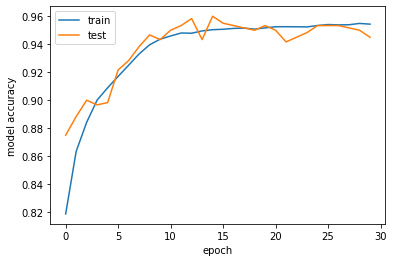

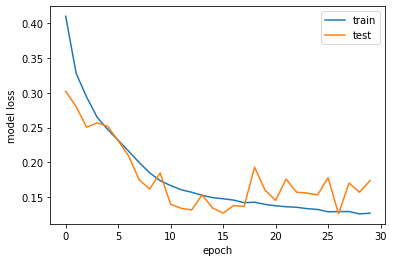

In [15]:
#Plot the results

score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history

# summarize history for accuracy
plt.plot(fit_new.history['accuracy'])
plt.plot(fit_new.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit_new.history['loss'])
plt.plot(fit_new.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Part 3

In [16]:
def compile_model(optimizer="adam",activation="relu",dropout_rate=0.2):
    # create the mode
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation)) 
    model.add(Dense(L/2,activation=activation))
    model.add(Dense(L/4,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid")) 
    # compile the model
    model.compile(loss="binary_crossentropy",
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [35]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                                   epochs=10, 
                                   batch_size=50, 
                                   verbose=1)

# list of allowed optional arguments for the optimizer, see compile_model()
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = [opt1,'RMSprop', 'Adam', 'Adamax'] #opt1 = SGD(learning_rate=0.1, momentum=0.9, nesterov=True) 
#activation = ["relu","elu","sigmoid","tanh"]
activation = ["relu","elu","sigmoid"]
#dropout_rate = [0,0.1,0.2,0.4,0.8]
dropout_rate = [0.2,0.4,0.8]
# define parameter dictionary
param_grid = dict(optimizer=optimizer,activation=activation,dropout_rate=dropout_rate)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(new_x_train,new_y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

================] - 0s 559us/step - loss: 0.5259 - accuracy: 0.7553
Epoch 1/10
576/576 [==============================] - 1s 827us/step - loss: 0.5873 - accuracy: 0.7355
Epoch 2/10
576/576 [==============================] - 0s 800us/step - loss: 0.5622 - accuracy: 0.7547
Epoch 3/10
576/576 [==============================] - 0s 762us/step - loss: 0.5339 - accuracy: 0.7546
Epoch 4/10
576/576 [==============================] - 0s 741us/step - loss: 0.5134 - accuracy: 0.7591
Epoch 5/10
576/576 [==============================] - 0s 777us/step - loss: 0.5111 - accuracy: 0.7569
Epoch 6/10
576/576 [==============================] - 0s 755us/step - loss: 0.5025 - accuracy: 0.7634
Epoch 7/10
576/576 [==============================] - 0s 792us/step - loss: 0.5027 - accuracy: 0.7638
Epoch 8/10
576/576 [==============================] - 0s 789us/step - loss: 0.5036 - accuracy: 0.7653
Epoch 9/10
576/576 [==============================] - 1s 886us/step - loss: 0.4981 - accuracy: 0.7650
Epoch 10/10
19

In [36]:
grid_result.score(x_test,y_test)

12/12 [==============================] - 0s 726us/step - loss: 0.2766 - accuracy: 0.8900


0.8899999856948853

In [37]:
act = grid_result.best_params_["activation"]
drop = grid_result.best_params_["dropout_rate"]
opt = grid_result.best_params_["optimizer"]

best_model = compile_model(activation=act,dropout_rate=drop,optimizer=opt)
fit_best = best_model.fit(new_x_train, new_y_train, 
                          epochs=30, batch_size=50,
                          validation_data=(x_test,y_test),
                          shuffle=True)

Epoch 1/30
768/768 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7557 - val_loss: 0.4688 - val_accuracy: 0.7700
Epoch 2/30
768/768 [==============================] - 1s 1ms/step - loss: 0.4441 - accuracy: 0.7933 - val_loss: 0.3982 - val_accuracy: 0.8300
Epoch 3/30
768/768 [==============================] - 1s 985us/step - loss: 0.3549 - accuracy: 0.8462 - val_loss: 0.3173 - val_accuracy: 0.8517
Epoch 4/30
768/768 [==============================] - 1s 927us/step - loss: 0.3058 - accuracy: 0.8734 - val_loss: 0.3026 - val_accuracy: 0.8617
Epoch 5/30
768/768 [==============================] - 1s 945us/step - loss: 0.2838 - accuracy: 0.8890 - val_loss: 0.3044 - val_accuracy: 0.8850
Epoch 6/30
768/768 [==============================] - 1s 914us/step - loss: 0.2667 - accuracy: 0.8948 - val_loss: 0.2791 - val_accuracy: 0.8817
Epoch 7/30
768/768 [==============================] - 1s 966us/step - loss: 0.2479 - accuracy: 0.9055 - val_loss: 0.2750 - val_accuracy: 0.8

19/19 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.8867

Test loss: 0.2868897616863251
Test accuracy: 0.8866666555404663


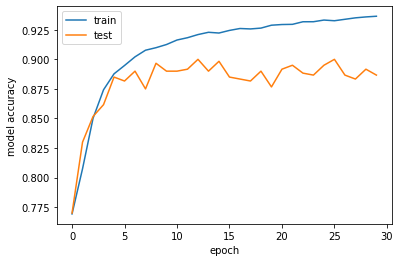

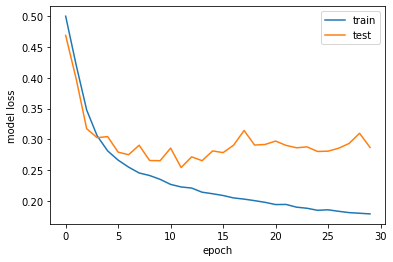

In [38]:
#Plot the results

score_best = best_model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score_best[0])
print('Test accuracy:', score_best[1])
# look into training history

# summarize history for accuracy
plt.plot(fit_best.history['accuracy'])
plt.plot(fit_best.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit_best.history['loss'])
plt.plot(fit_best.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

19/19 [==============================] - 0s 942us/step - loss: 0.1737 - accuracy: 0.9450

Test loss: 0.17370811104774475
Test accuracy: 0.9449999928474426


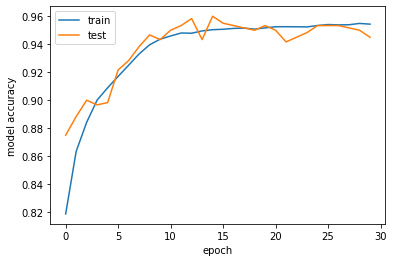

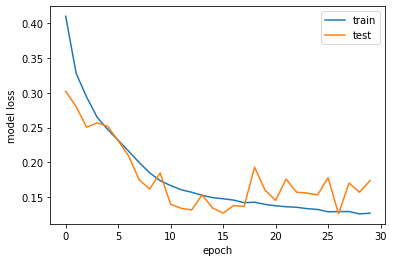

In [39]:
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history

# summarize history for accuracy
plt.plot(fit_new.history['accuracy'])
plt.plot(fit_new.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit_new.history['loss'])
plt.plot(fit_new.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()